In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize

Market Segmentation 
A) TRANSACTORS-> Customers who pay least amount of interest charges and carefull with their money

B) REVOLVERS-> Customers who use their credit card as a loan. This group is the most lucrative sector for bank as they 
               pay +20% of interest.
    
C)NEW CUSTOMERS-> New customers with lower tenure can be targeted to enroll int other services of bank

D)VIP/PRIME-> Targeted ti increase their credit card limit or spending.

In [2]:
myfile=r'C:\Users\Lenovo\Desktop\MLdataset\CC GENERAL.csv'
df1=pd.read_csv(myfile)
df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#dropping CUST_ID column from the dataframe
df1.drop(['CUST_ID'],axis=1,inplace=True)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#dimensions of data 
df1.shape


(8950, 17)

In [17]:
creditcard_df=df1.copy()

In [5]:
#information related to datatypes 
df1.info()
#we can see we have only two types of datatype float and int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [6]:
#descriptive statistics of data
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Avergae balance is ~1564,min balance ~0 and max ~19043
#Average Balance_frequency is 0.877
#Average purchase_frequency is almost 50%
#cash advance frequency is 0.133 on an average.
#Average credit limit is ~4494.44
#Average tenure of customer is ~11.5 years


In [8]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# VISUALIZE AND EXPLORE DATA

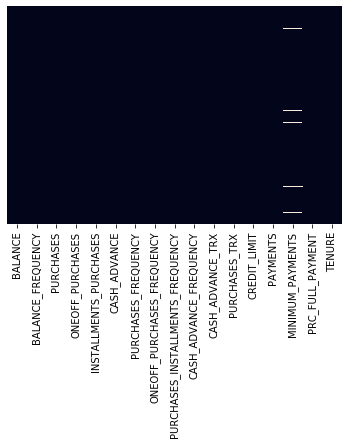

In [14]:
#Let's see if we have any missing values in our dataset

sn.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [15]:
 df1.isnull().sum()   #Luckily we don't have many missing values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

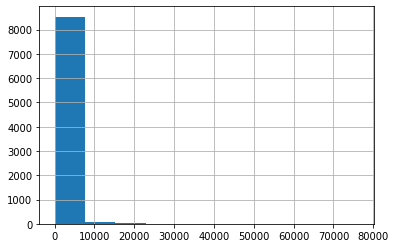

In [18]:
df1['MINIMUM_PAYMENTS'].hist()

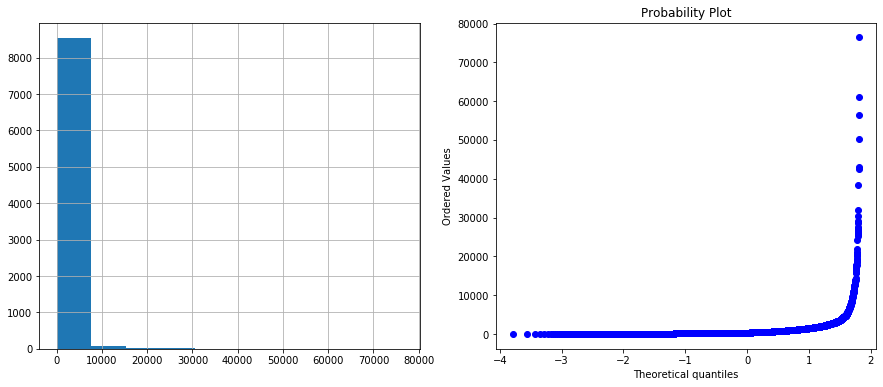

In [32]:
#QQ PLOT FOR MINIMUM_PAYMENTS 
def normal_plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()
normal_plot(df1,'MINIMUM_PAYMENTS') 

The distribution of MINIMUM_PAYMENTS is not normal so we need to transform that feature so we can fill missing values by their means

In [33]:
df1['MINIMUM_PAYMENTS']=np.log(df1['MINIMUM_PAYMENTS']+1) 

# transformation of feature MINIMUM_PAYMENTS(log transformation)

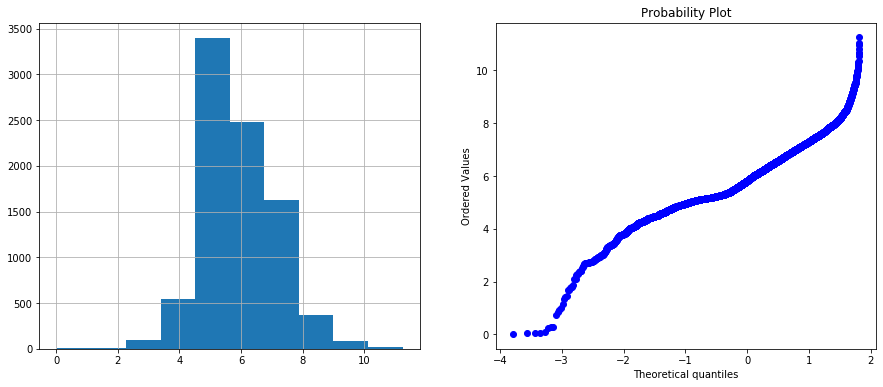

In [34]:
def normal_plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()
normal_plot(df1,'MINIMUM_PAYMENTS') 

In above figure we clearly see after log transformation the feature MINIMUM_PAYMENTS looks bell shaped (Normal curve)

In [36]:
#Fill up the missing value with the mean of MINIMUM_PAYMENTS

df1.loc[(df1['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df1['MINIMUM_PAYMENTS'].mean()

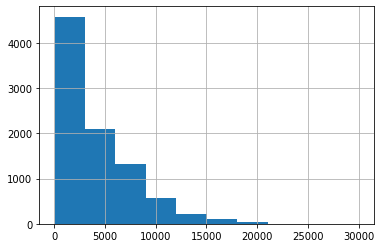

In [19]:
df1['CREDIT_LIMIT'].hist()

In [37]:
#as we can see distribution of CREDIT_LIM is not normal so we are filling the missing values with median
df1.loc[(df1['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df1['CREDIT_LIMIT'].median()

In [38]:
df1.isnull().sum() # we are now done with filling missing values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [40]:
n=len(df1.columns)
n

17

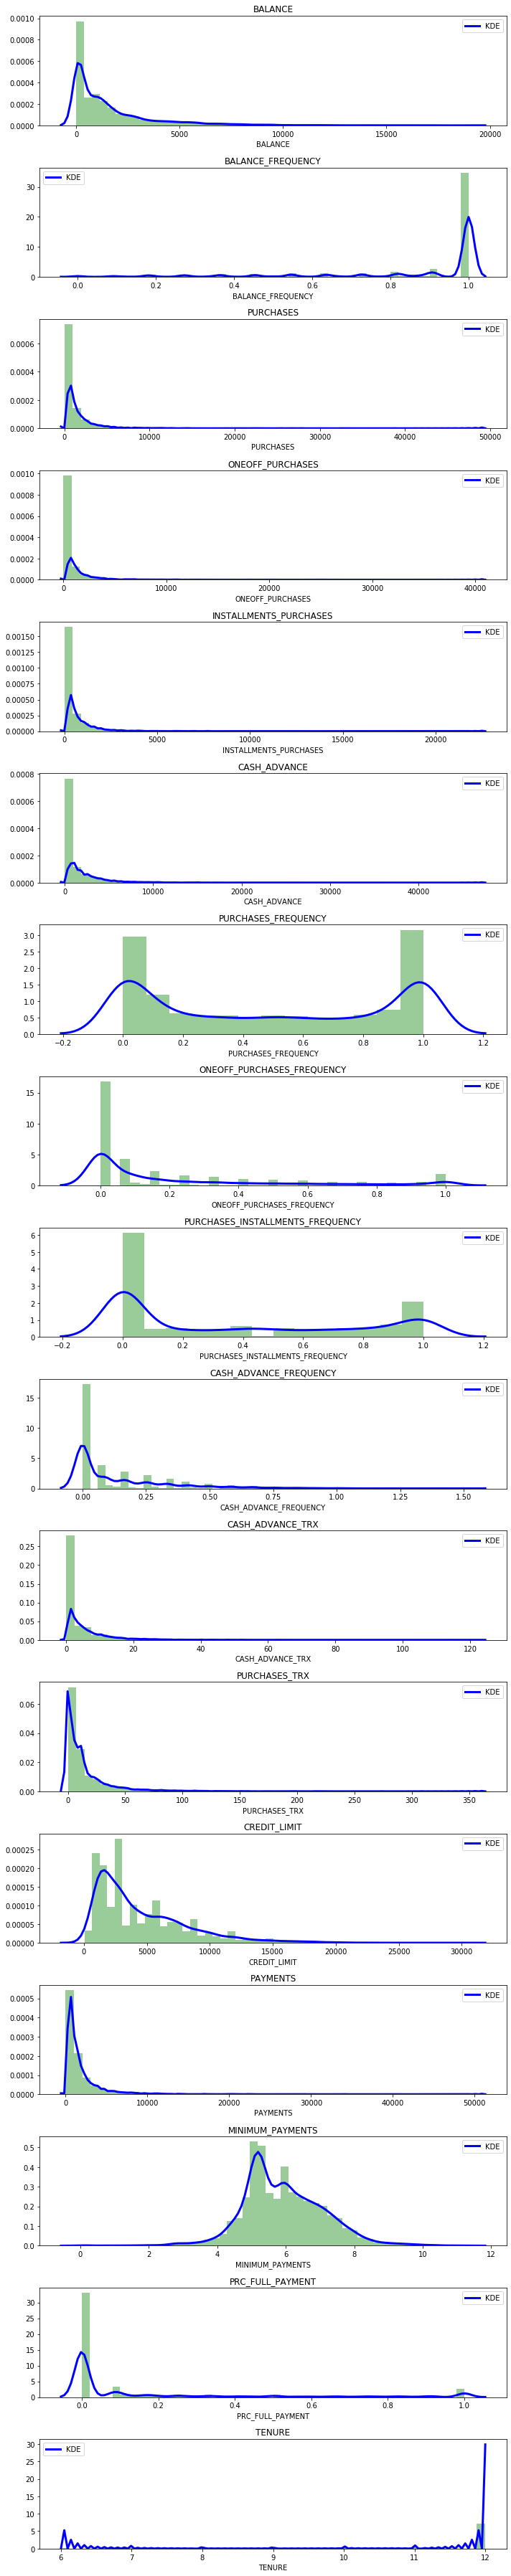

In [70]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(df1.columns)):
  plt.subplot(17, 1, i+1)
  sn.distplot(df1[df1.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df1.columns[i])

plt.tight_layout()

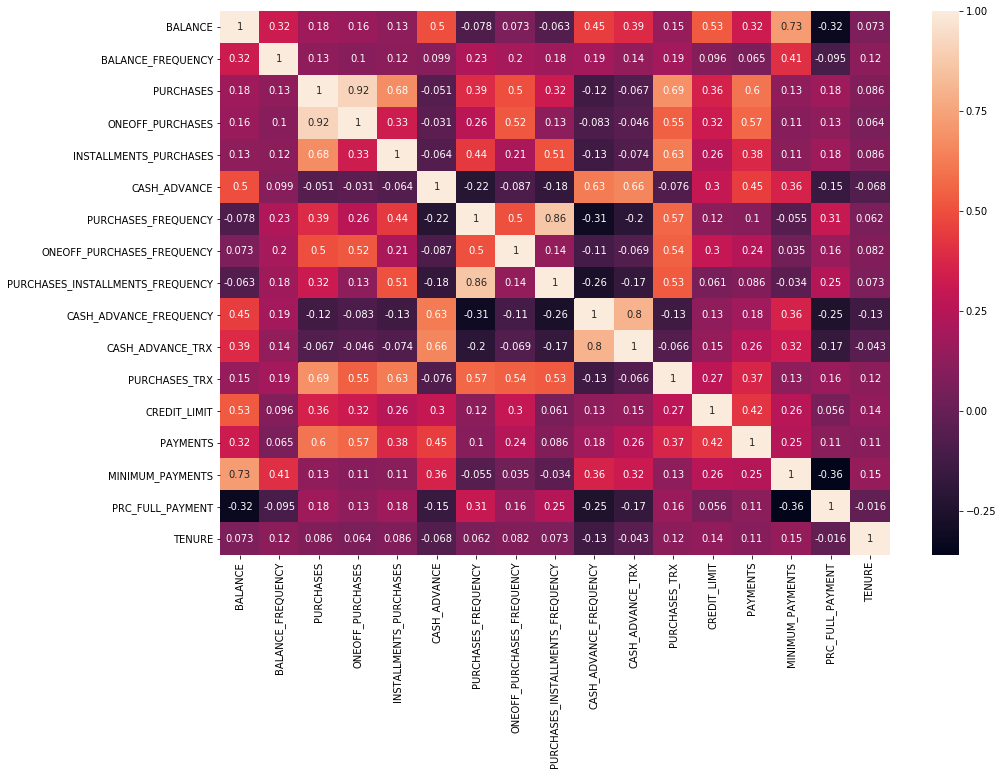

In [45]:
#Obtain the correation matrix 
plt.figure(figsize=(15,10))
sn.heatmap(df1.corr(),annot=True)

#SCALE THE DATA BY USING STANDARDSCALER

In [48]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [51]:
df1_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.83538484,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.90329658,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ...,  0.44534652,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -1.28125319,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -1.61057269,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -1.22309692,
        -0.52555097, -4.12276757]])

#FIND THE OTPIMAL NUMBER OF CLUSTER BY ELBOW METHOD

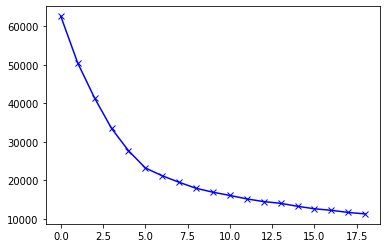

In [52]:
scores_1=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1_scaled[:,:7])
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1,'bx-')    

# From this we can observe that, 5th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

# APPLY KMEANS METHOD

In [53]:
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(df1_scaled)
labels = kmeans.labels_

In [54]:
kmeans.cluster_centers_.shape

(7, 17)

In [56]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.707793,-2.051233,-0.301223,-0.224551,-0.299598,-0.337099,-0.513185,-0.403171,-0.424621,-0.525006,-0.380019,-0.406140,-0.162579,-0.215318,-0.965826,0.294749,0.208364
1,1.697791,0.396874,-0.197177,-0.145897,-0.198279,1.964181,-0.436586,-0.183014,-0.385277,1.861724,1.871207,-0.229452,1.013409,0.814575,1.145857,-0.401142,0.053516
2,0.011368,0.406640,-0.344186,-0.227654,-0.395476,-0.093614,-0.807737,-0.344858,-0.744014,0.096659,-0.034073,-0.463315,-0.310151,-0.239174,0.238027,-0.454817,0.269824
3,-0.394771,0.352118,-0.042358,-0.233271,0.328252,-0.379087,0.987420,-0.351537,1.178137,-0.488137,-0.371296,0.169895,-0.283323,-0.234929,-0.179699,0.325126,0.259109
4,1.395997,0.410728,7.216513,6.424562,5.257658,0.022162,1.080082,1.907943,1.027240,-0.285268,-0.103238,4.796145,2.208664,4.995947,0.899112,0.853418,0.332303
5,-0.368487,-0.368643,-0.282369,-0.208894,-0.283524,0.027520,-0.178881,-0.266852,-0.217028,0.276020,-0.016830,-0.384095,-0.572258,-0.394142,-0.581536,0.023099,-3.189610
6,0.149510,0.436582,0.960145,0.899073,0.618452,-0.309969,1.098252,1.855414,0.557578,-0.406695,-0.314892,1.221367,0.699432,0.401580,0.101899,0.439682,0.306591


In [57]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,91.263274,0.391353,359.636978,219.729025,140.145204,271.958783,0.284385,0.082184,0.195682,0.030085,0.655476,4.614708,3902.749356,1109.818609,4.792736,0.239924,11.796163
1,5098.282574,0.971286,581.933818,350.277592,231.766497,5097.850948,0.315128,0.147861,0.211318,0.507694,16.018438,9.006508,8181.512522,4091.259389,7.262186,0.036388,11.588937
2,1588.135849,0.973600,267.845711,214.577777,53.443361,782.557471,0.166167,0.099580,0.068747,0.154487,3.016306,3.193548,3365.815905,1040.757852,6.200549,0.020688,11.878412
3,742.792701,0.960684,912.706074,205.255488,707.901966,183.907397,0.886650,0.097587,0.832659,0.037463,0.715008,18.932794,3463.426075,1053.046288,5.712051,0.248808,11.864073
4,4470.125318,0.974568,16421.396962,11255.894557,5165.502405,1025.346420,0.923840,0.771634,0.772689,0.078059,2.544304,133.924051,12530.379747,16195.919763,6.973637,0.403325,11.962025
5,797.499998,0.789943,399.918214,245.716571,154.680112,1036.582018,0.418557,0.122851,0.278185,0.190379,3.133971,5.162679,2412.153110,592.141829,5.242133,0.160471,7.248804
6,1875.666747,0.980693,3054.569056,2084.715216,970.325909,328.851920,0.931132,0.755964,0.586033,0.053760,1.099921,45.068450,7039.124526,2895.677535,6.041358,0.282314,11.927616


In [58]:
labels.shape

(8950,)

In [59]:
y_kmeans = kmeans.fit_predict(df1_scaled)
y_kmeans


array([2, 1, 6, ..., 5, 5, 5])

In [60]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df1, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,4.945277,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,6.978531,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,6.442994,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,5.922195,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,5.504483,0.000000,12,2


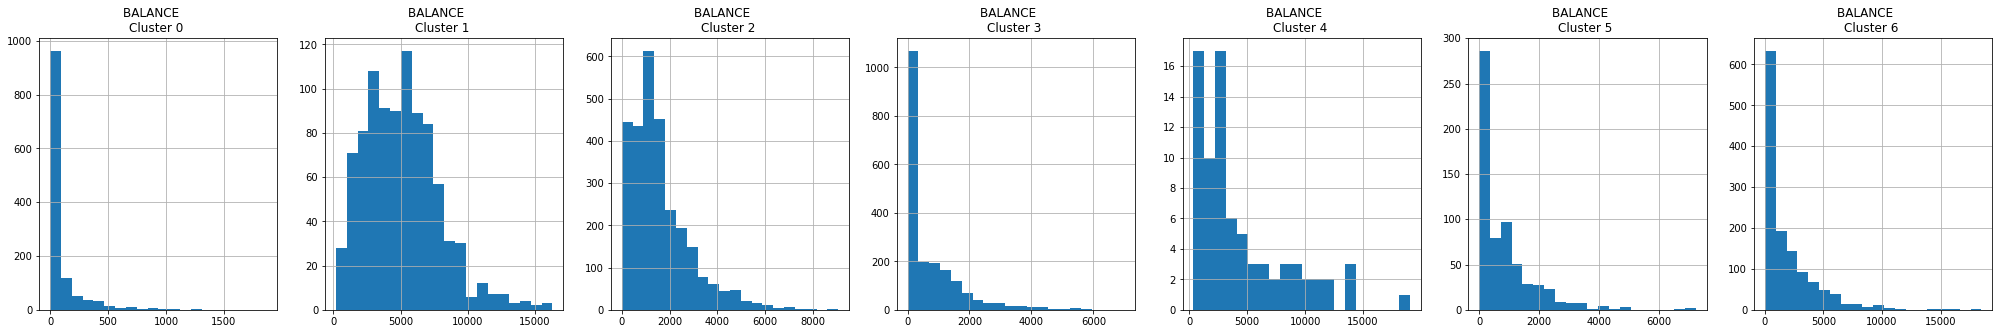

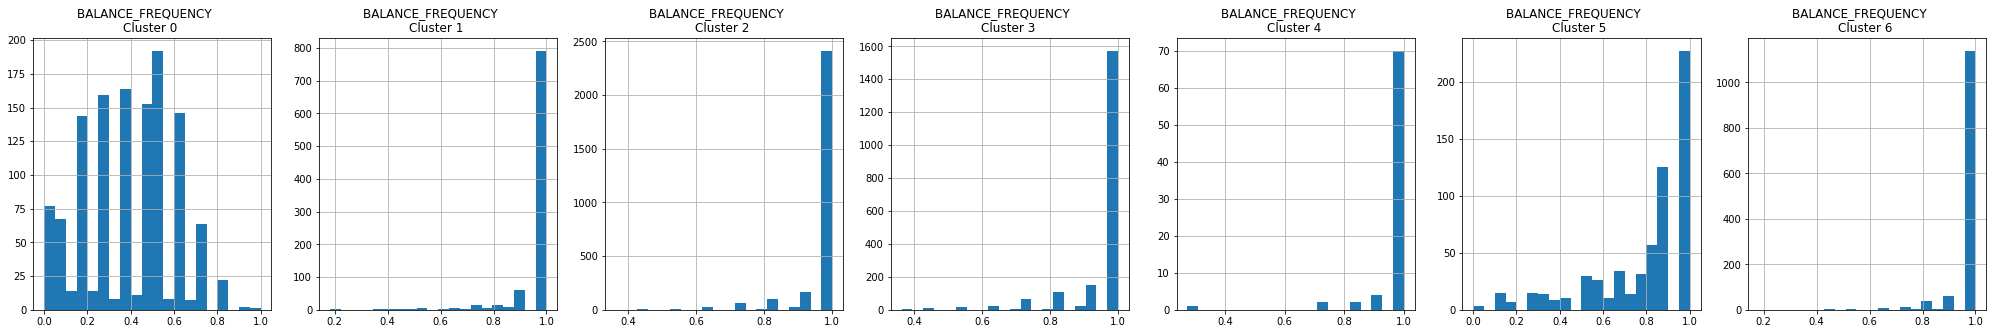

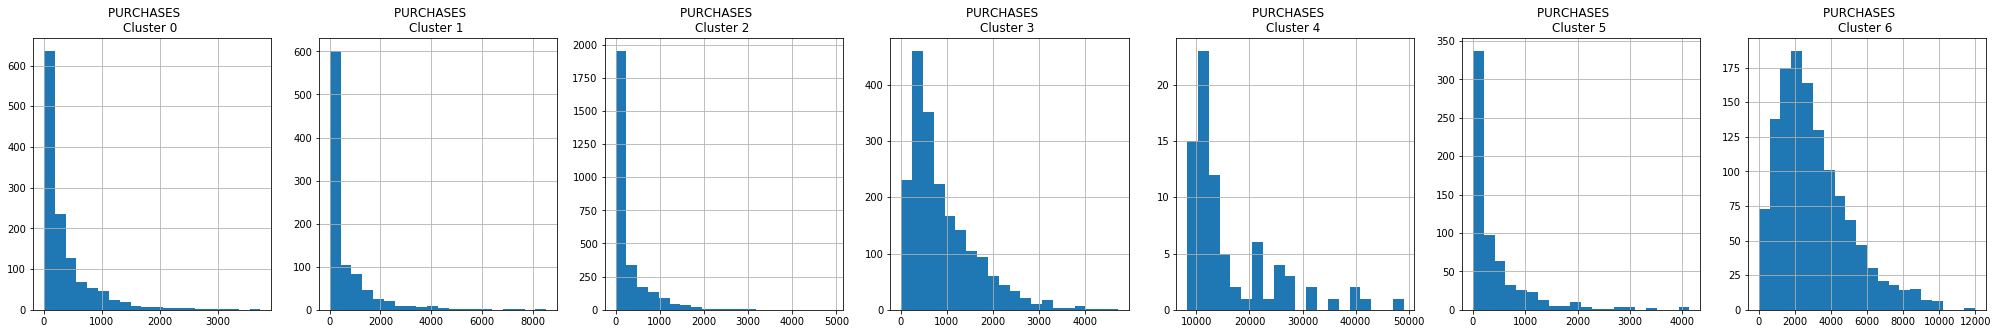

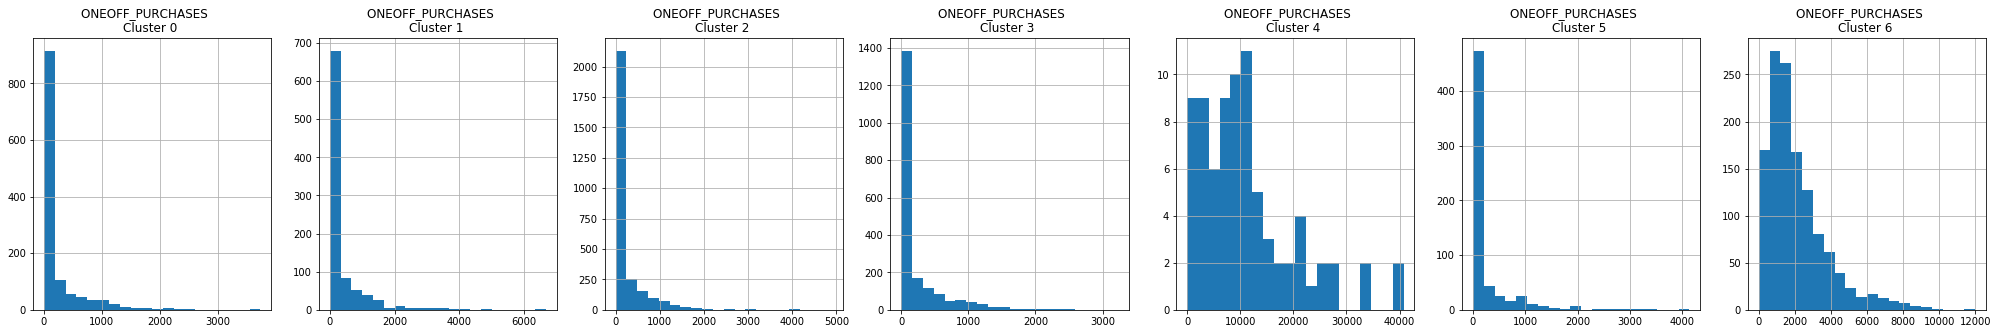

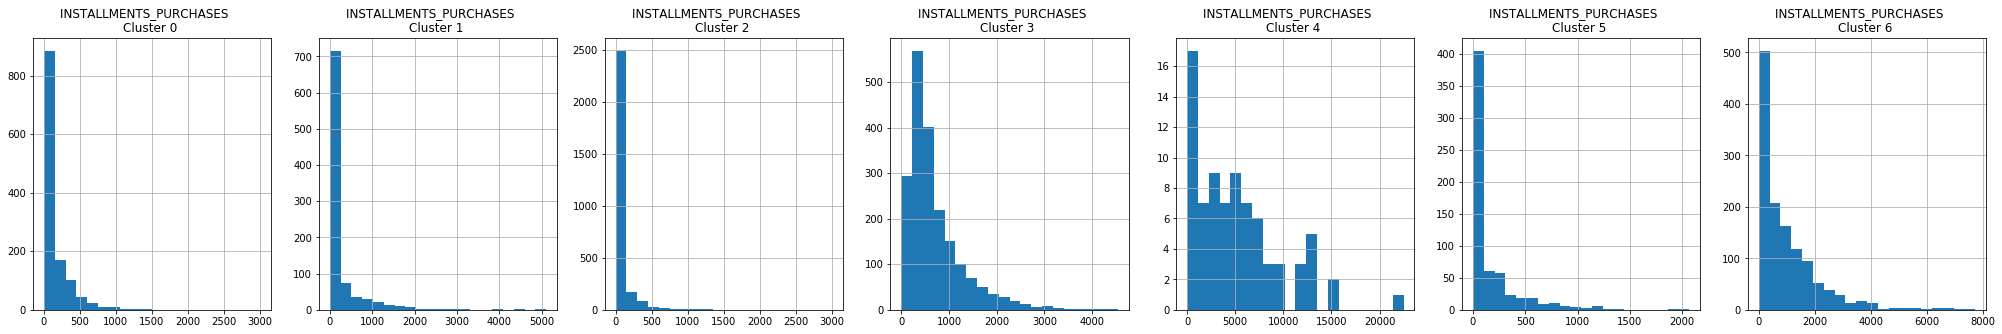

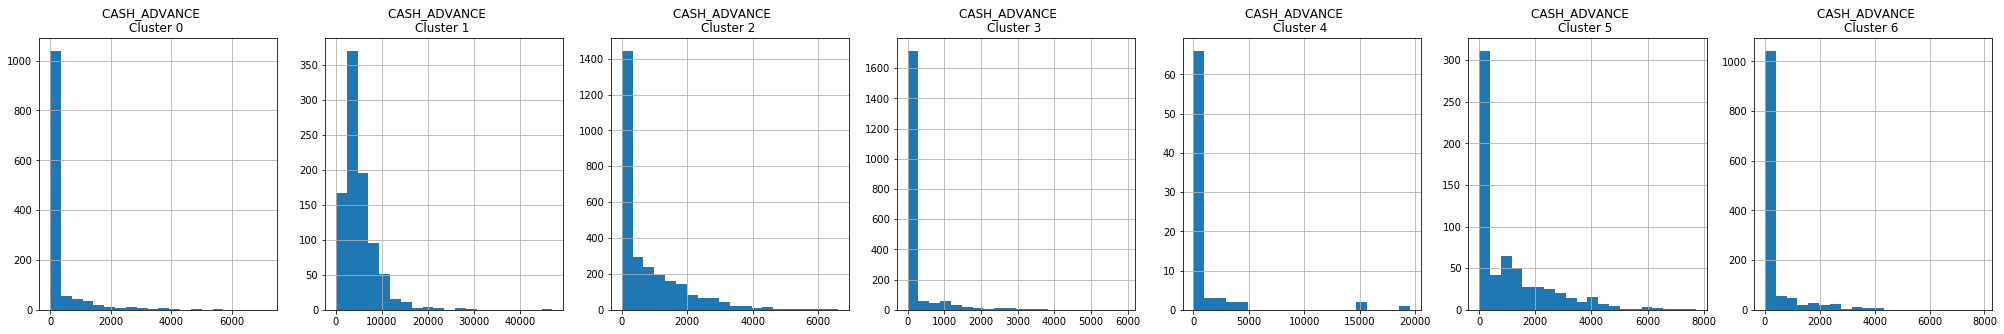

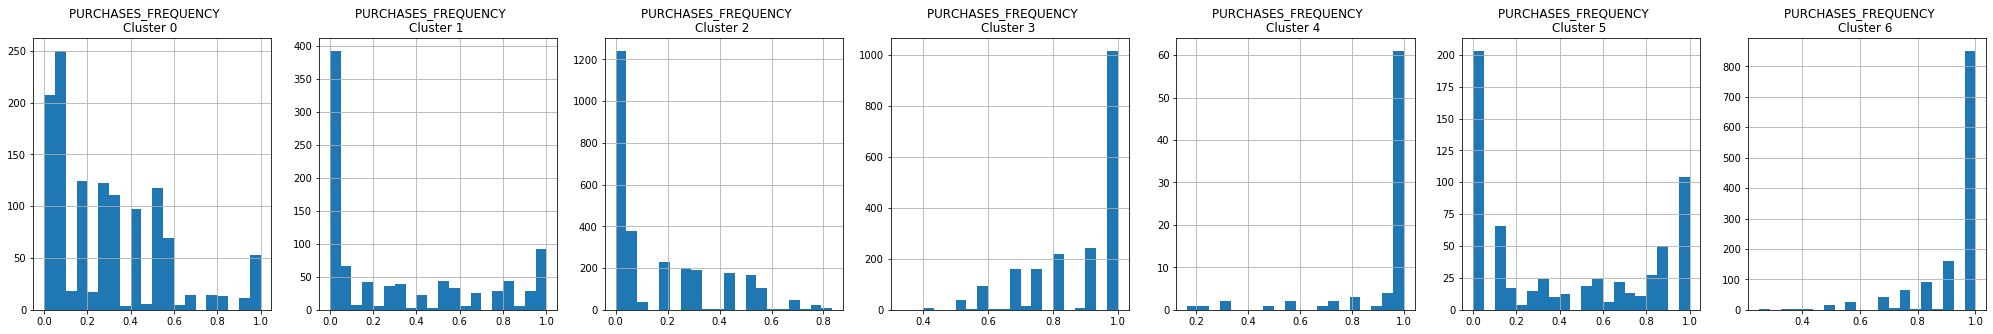

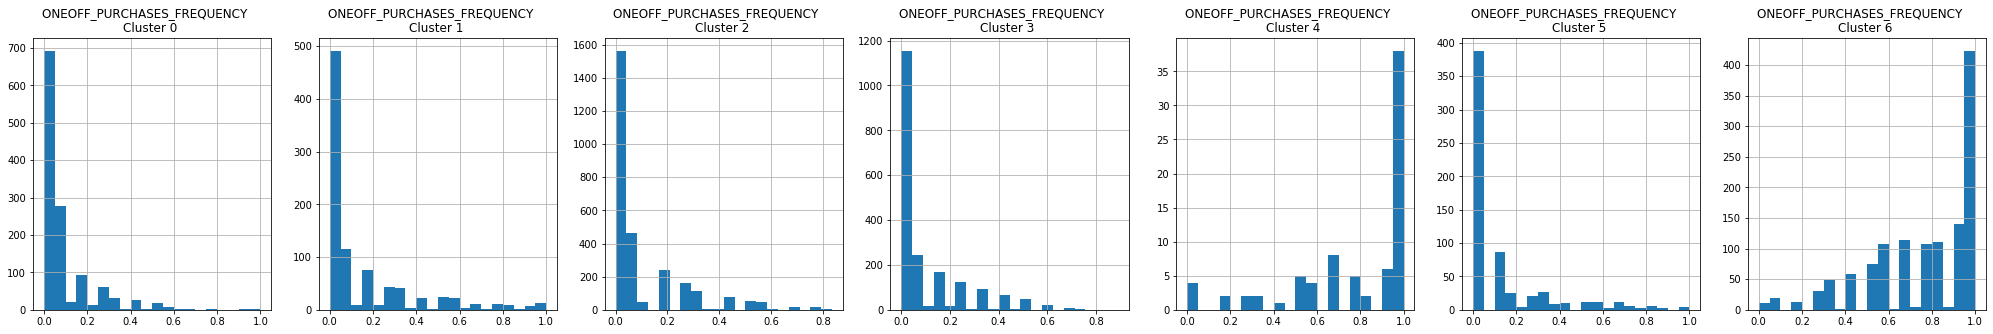

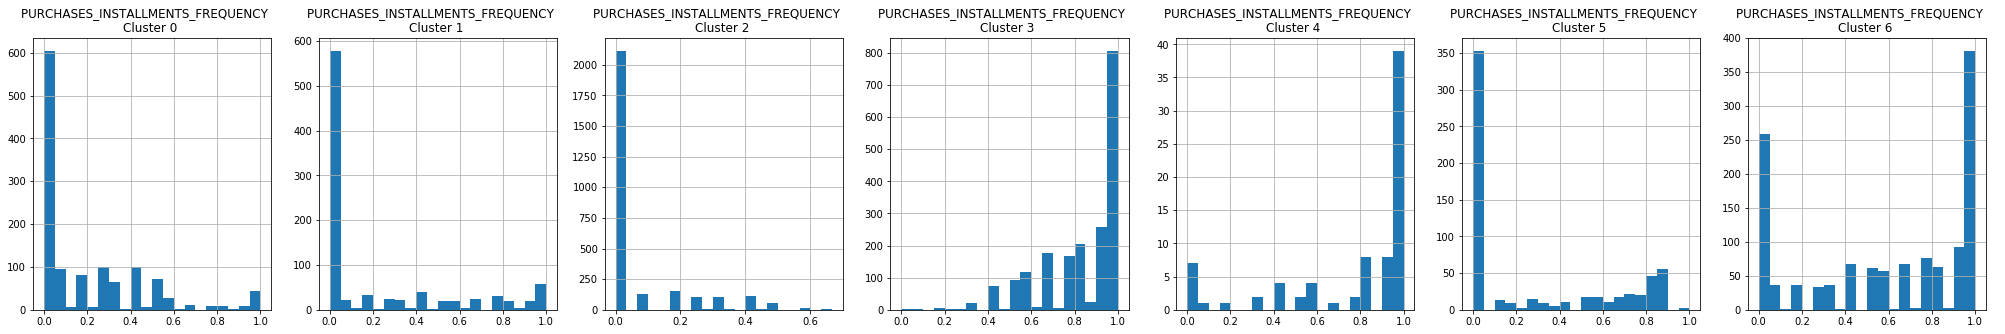

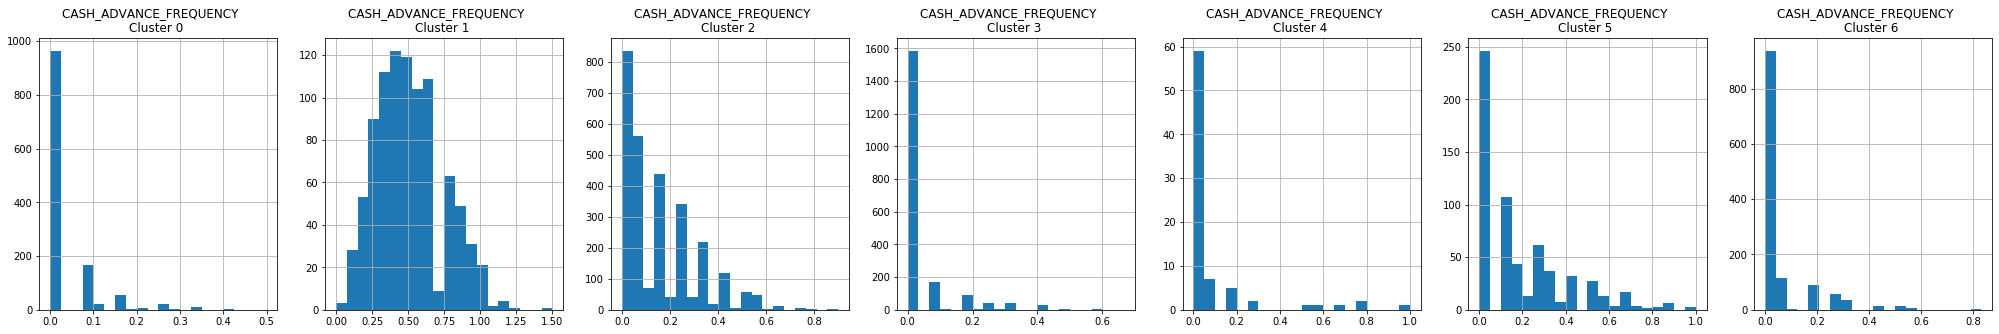

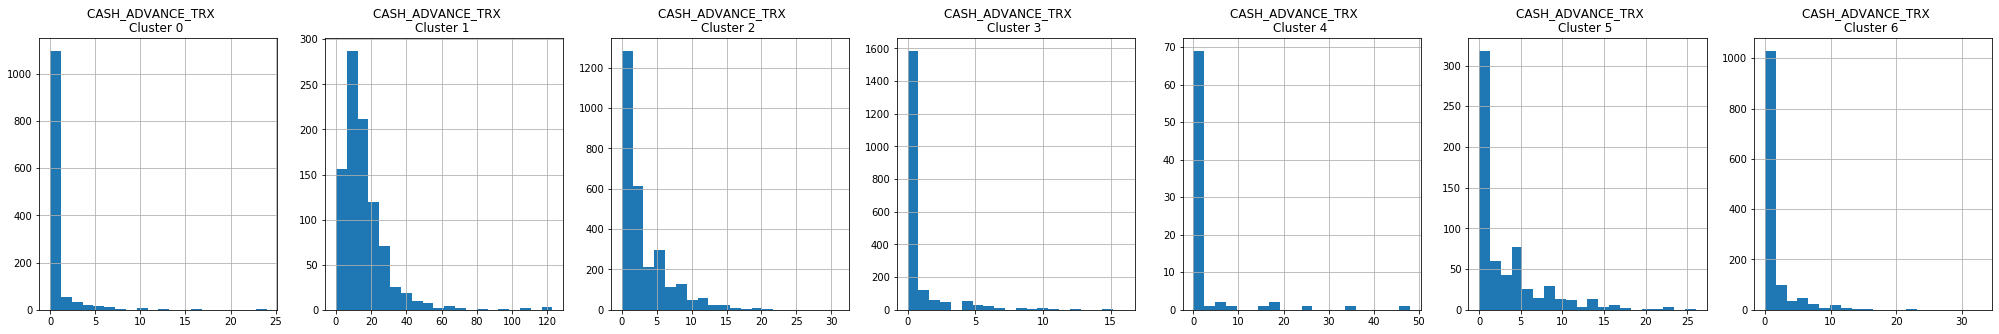

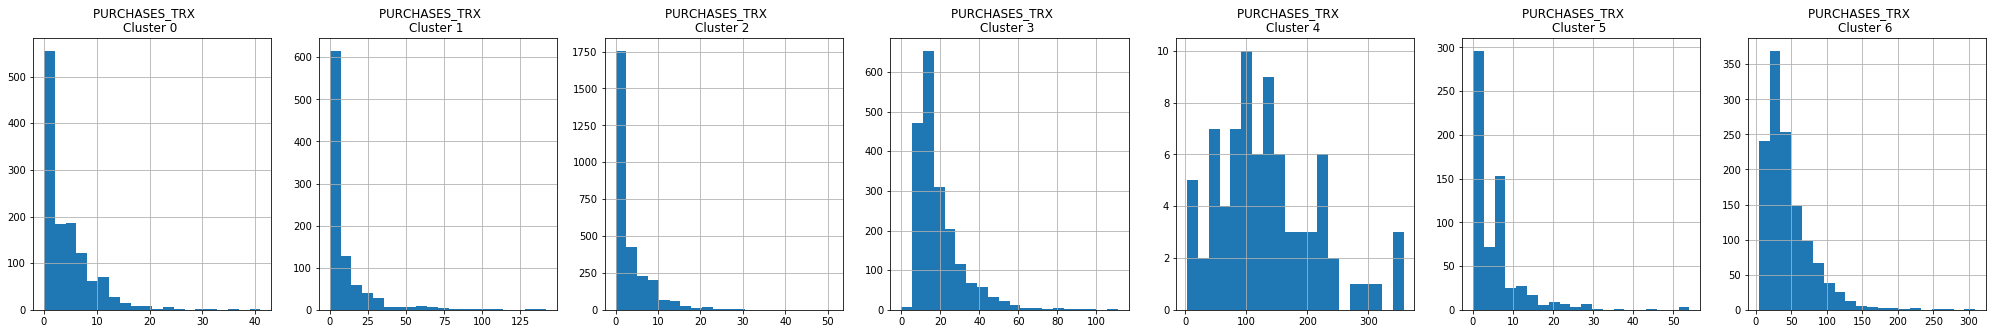

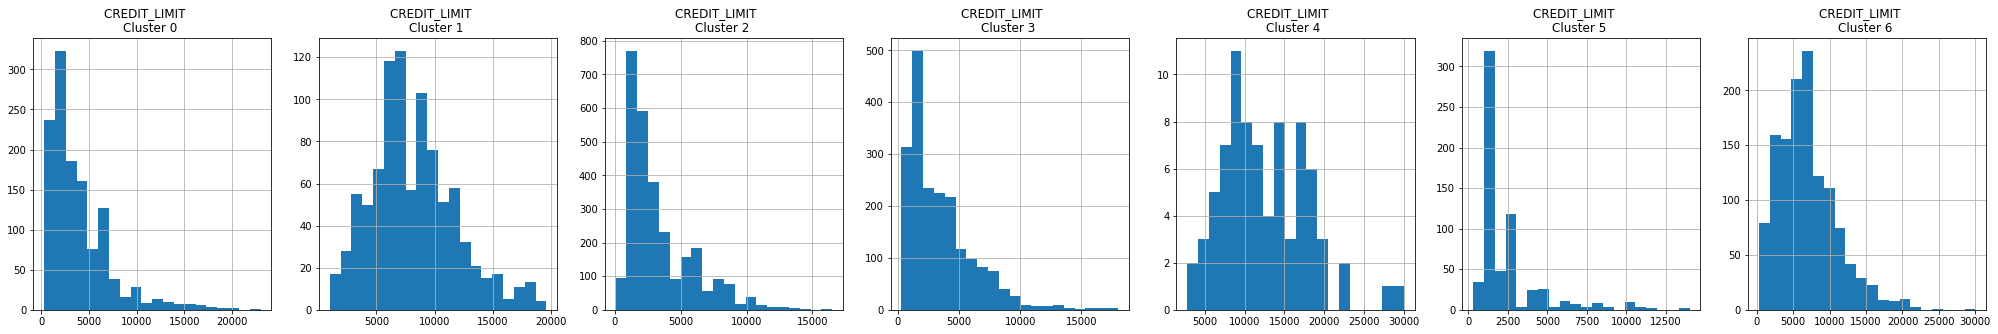

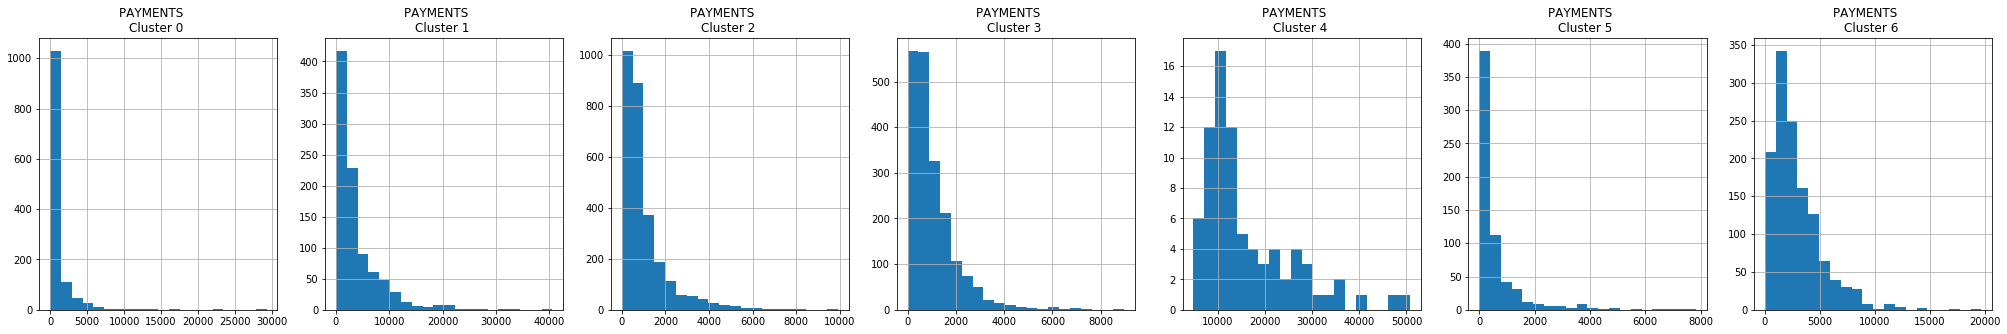

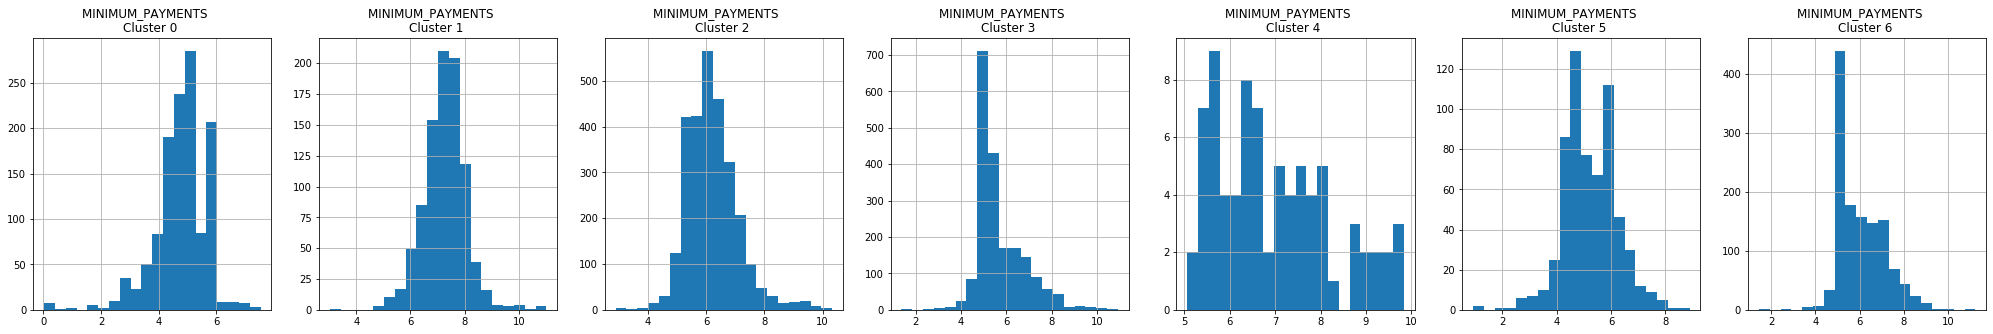

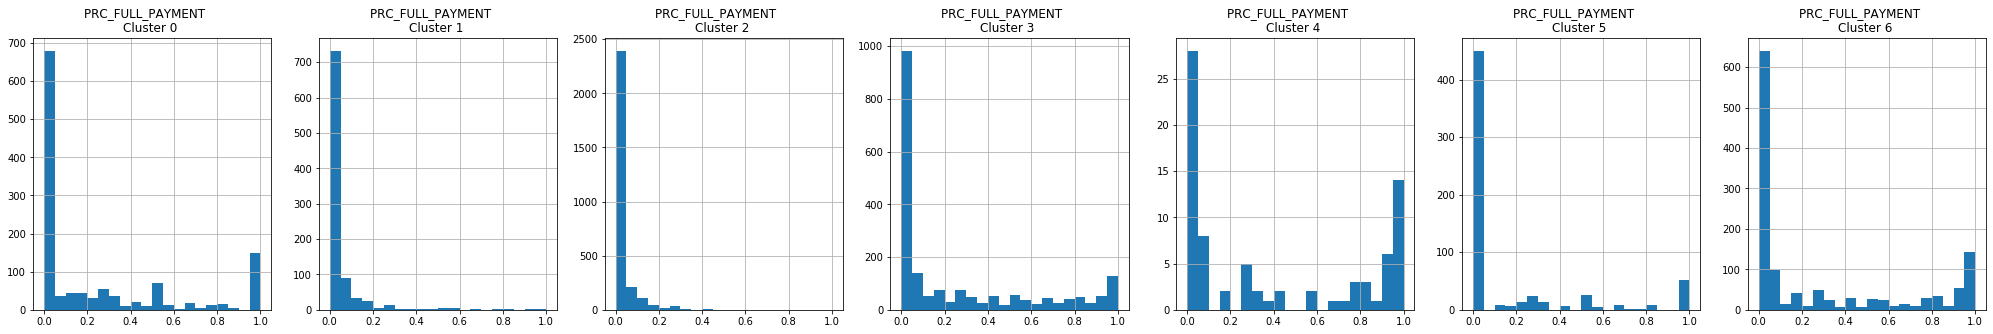

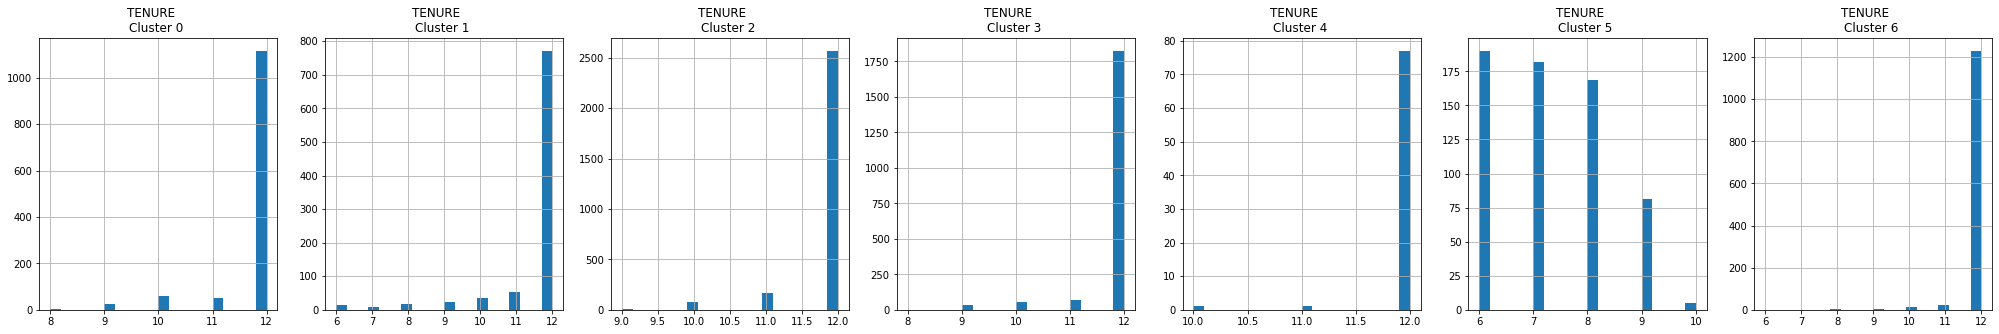

In [61]:
# Plot the histogram of various clusters
for i in df1.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [65]:
# Obtain the principal components 
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df1_scaled)


In [66]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.807502,-1.098763
1,-0.885320,2.739420
2,1.006370,-0.222286
3,-0.870494,0.097853
4,-1.646967,-0.554528


In [67]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.807502,-1.098763,2
1,-0.885320,2.739420,1
2,1.006370,-0.222286,6
3,-0.870494,0.097853,2
4,-1.646967,-0.554528,2


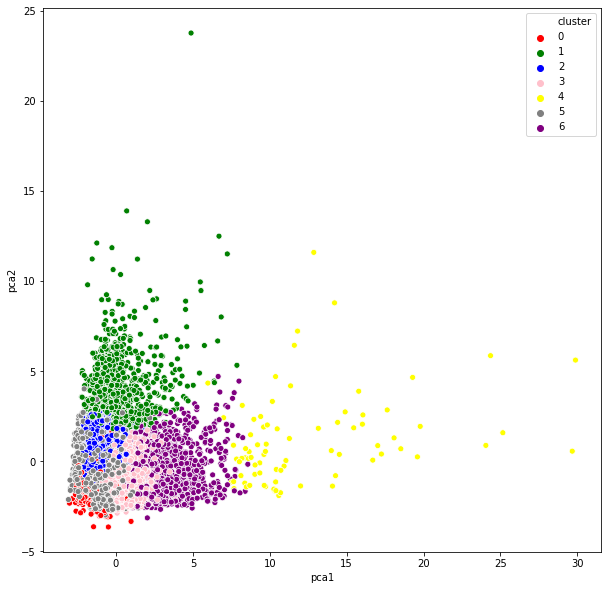

In [68]:
plt.figure(figsize=(10,10))
ax = sn.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()